In [1]:
!pip install h5py

You should consider upgrading via the 'C:\Users\vdalal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [25]:
import h5py
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
f = h5py.File('./spectrograms.h5', 'r')
species_keys = list(f.keys())
species_keys

['amecro',
 'barswa',
 'bkcchi',
 'blujay',
 'daejun',
 'houfin',
 'mallar3',
 'norfli',
 'rewbla',
 'stejay',
 'wesmea',
 'whcspa']

In [4]:
list(f.items())

[('amecro', <HDF5 dataset "amecro": shape (256, 343, 52), type "<f8">),
 ('barswa', <HDF5 dataset "barswa": shape (256, 343, 55), type "<f8">),
 ('bkcchi', <HDF5 dataset "bkcchi": shape (256, 343, 57), type "<f8">),
 ('blujay', <HDF5 dataset "blujay": shape (256, 343, 50), type "<f8">),
 ('daejun', <HDF5 dataset "daejun": shape (256, 343, 58), type "<f8">),
 ('houfin', <HDF5 dataset "houfin": shape (256, 343, 44), type "<f8">),
 ('mallar3', <HDF5 dataset "mallar3": shape (256, 343, 36), type "<f8">),
 ('norfli', <HDF5 dataset "norfli": shape (256, 343, 59), type "<f8">),
 ('rewbla', <HDF5 dataset "rewbla": shape (256, 343, 41), type "<f8">),
 ('stejay', <HDF5 dataset "stejay": shape (256, 343, 40), type "<f8">),
 ('wesmea', <HDF5 dataset "wesmea": shape (256, 343, 36), type "<f8">),
 ('whcspa', <HDF5 dataset "whcspa": shape (256, 343, 51), type "<f8">)]

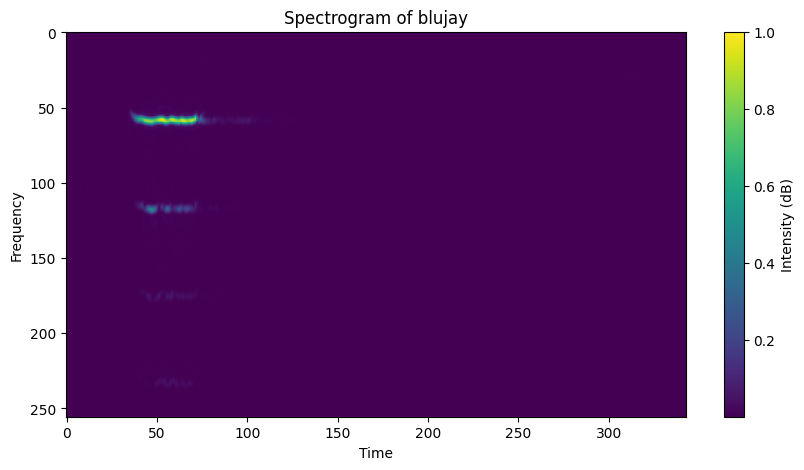

In [5]:
species_name = 'blujay'

# Get the dataset for the chosen species
species_data = f[species_name][:]

# Choose a sample spectrogram to visualize (e.g., the first one)
sample_spectrogram = species_data[:, :, 0]

# Plot the spectrogram
plt.figure(figsize=(10, 5))
plt.imshow(sample_spectrogram, aspect='auto', cmap='viridis')
plt.title(f'Spectrogram of {species_name}')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Intensity (dB)')
plt.show()


In [14]:
# Get data for "daejun" and "houfin"
data_species_1 = f["daejun"][:]
data_species_2 = f["houfin"][:]

In [15]:
features = []
labels = []

# Add data for "daejun" with label 1
for i in range(data_species_1.shape[2]):
    features.append(data_species_1[:, :, i])  # Add spectrograms
    labels.append(1)  # Label for "daejun"

# Add data for "houfin" with label 0
for i in range(data_species_2.shape[2]):
    features.append(data_species_2[:, :, i])  # Add spectrograms
    labels.append(0)  # Label for "houfin"

In [16]:
# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)
features

array([[[1.47683627e-05, 1.98766538e-05, 4.36992371e-05, ...,
         1.13621483e-06, 1.18660586e-05, 3.47423209e-05],
        [2.87145620e-05, 5.38878722e-05, 1.68032669e-05, ...,
         1.66500762e-05, 2.08396209e-05, 2.47836728e-05],
        [2.29134005e-05, 4.40709868e-05, 4.50509406e-05, ...,
         2.39801535e-05, 1.65873038e-05, 8.88735441e-06],
        ...,
        [2.36818923e-03, 1.06765267e-02, 1.03153430e-02, ...,
         7.08790822e-03, 1.19139902e-02, 1.49614543e-02],
        [2.03195358e-03, 8.03979423e-03, 6.90137097e-03, ...,
         8.11933532e-03, 1.06971787e-02, 9.72624859e-03],
        [1.58376929e-03, 5.43036273e-03, 3.85092803e-03, ...,
         7.42250950e-03, 7.78592006e-03, 4.87403172e-03]],

       [[1.22616948e-04, 8.89989351e-05, 1.00349455e-04, ...,
         4.78107236e-06, 1.02975547e-04, 9.08282349e-06],
        [9.89979085e-05, 1.12615474e-04, 8.55410231e-05, ...,
         2.29753789e-05, 7.41233082e-05, 5.03344258e-05],
        [8.96221924e-05, 

In [17]:
features = features / np.max(features)  # Normalize to [0, 1]
features

array([[[1.47683627e-05, 1.98766538e-05, 4.36992371e-05, ...,
         1.13621483e-06, 1.18660586e-05, 3.47423209e-05],
        [2.87145620e-05, 5.38878722e-05, 1.68032669e-05, ...,
         1.66500762e-05, 2.08396209e-05, 2.47836728e-05],
        [2.29134005e-05, 4.40709868e-05, 4.50509406e-05, ...,
         2.39801535e-05, 1.65873038e-05, 8.88735441e-06],
        ...,
        [2.36818923e-03, 1.06765267e-02, 1.03153430e-02, ...,
         7.08790822e-03, 1.19139902e-02, 1.49614543e-02],
        [2.03195358e-03, 8.03979423e-03, 6.90137097e-03, ...,
         8.11933532e-03, 1.06971787e-02, 9.72624859e-03],
        [1.58376929e-03, 5.43036273e-03, 3.85092803e-03, ...,
         7.42250950e-03, 7.78592006e-03, 4.87403172e-03]],

       [[1.22616948e-04, 8.89989351e-05, 1.00349455e-04, ...,
         4.78107236e-06, 1.02975547e-04, 9.08282349e-06],
        [9.89979085e-05, 1.12615474e-04, 8.55410231e-05, ...,
         2.29753789e-05, 7.41233082e-05, 5.03344258e-05],
        [8.96221924e-05, 

In [18]:
features = features[..., np.newaxis]  # Adding the channel dimension
features

array([[[[1.47683627e-05],
         [1.98766538e-05],
         [4.36992371e-05],
         ...,
         [1.13621483e-06],
         [1.18660586e-05],
         [3.47423209e-05]],

        [[2.87145620e-05],
         [5.38878722e-05],
         [1.68032669e-05],
         ...,
         [1.66500762e-05],
         [2.08396209e-05],
         [2.47836728e-05]],

        [[2.29134005e-05],
         [4.40709868e-05],
         [4.50509406e-05],
         ...,
         [2.39801535e-05],
         [1.65873038e-05],
         [8.88735441e-06]],

        ...,

        [[2.36818923e-03],
         [1.06765267e-02],
         [1.03153430e-02],
         ...,
         [7.08790822e-03],
         [1.19139902e-02],
         [1.49614543e-02]],

        [[2.03195358e-03],
         [8.03979423e-03],
         [6.90137097e-03],
         ...,
         [8.11933532e-03],
         [1.06971787e-02],
         [9.72624859e-03]],

        [[1.58376929e-03],
         [5.43036273e-03],
         [3.85092803e-03],
         ...,
 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Display the shapes to ensure the split worked correctly
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (81, 256, 343, 1)
y_train shape: (81,)
X_test shape: (21, 256, 343, 1)
y_test shape: (21,)


In [20]:
cnn_model = keras.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 343, 1)),  # Input shape is (256, 343, 1)
    layers.MaxPooling2D((2, 2)),  # First pooling layer
    layers.Dropout(0.4),
    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Second pooling layer
    
    # Third convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Third pooling layer
    layers.Dropout(0.4),
    # Flatten the output for dense layers
    layers.Flatten(),  
    
    # Fully connected dense layer
    layers.Dense(128, activation='relu'),  # Relu activation
    layers.Dropout(0.5),  # Dropout with a rate of 50%

    # Output layer with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')  
])

C:\Users\vdalal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
cnn_model.compile(
    optimizer='adam',  # Adam optimizer
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Using accuracy as a metric
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5807 - loss: 0.6594 - val_accuracy: 1.0000 - val_loss: 0.3674
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9410 - loss: 0.2694 - val_accuracy: 0.8889 - val_loss: 0.1763
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9518 - loss: 0.0964 - val_accuracy: 1.0000 - val_loss: 0.0545
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9813 - loss: 0.0625 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9783 - loss: 0.0771 - val_accuracy: 1.0000 - val_loss: 0.0111
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0682
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8889 - val_loss: 0.1752
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 6.6838e-04 - val_accuracy: 0.8889 - val_loss: 0.2645
Epoch 9/10


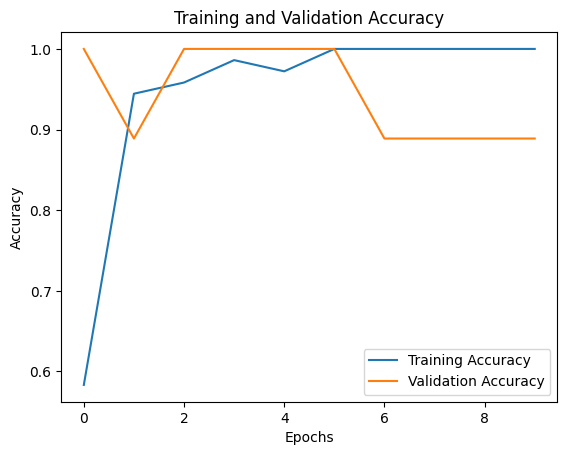

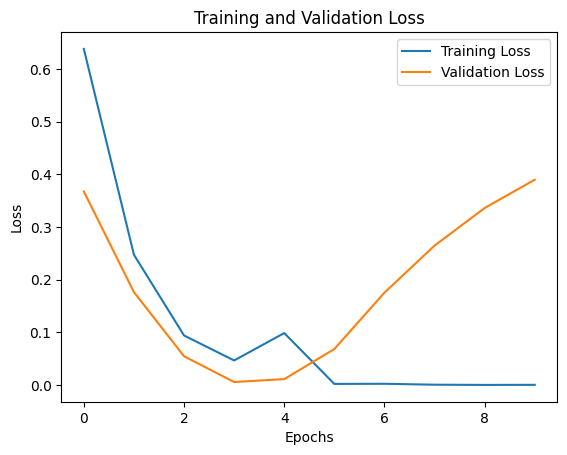

In [22]:
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 1.0000 - loss: 0.0191
Test Loss: 0.019138481467962265
Test Accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


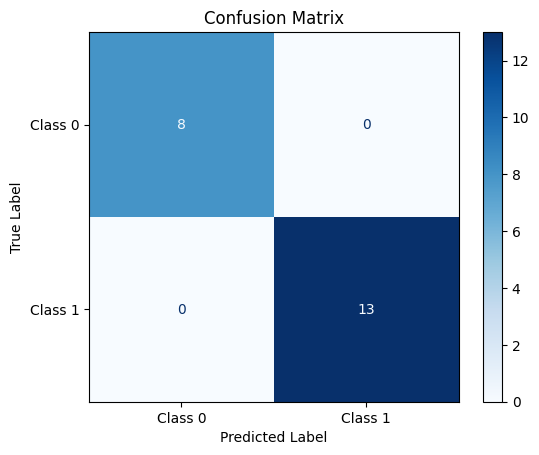

In [27]:
y_pred = (cnn_model.predict(X_test) > 0.3).astype("int32")  # Assuming binary classification

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [15]:
simple_nn = keras.Sequential([
    # Input layer (Flatten to ensure compatibility with dense layers)
    layers.Flatten(input_shape=(256, 343, 1)),  # Flatten from (256, 343, 1) to (256*343)
    
    # First dense layer with ReLU activation
    layers.Dense(128, activation='relu'),  # Fully connected layer
    
    # Dropout to reduce overfitting
    layers.Dropout(0.3),  # Dropout with a rate of 30%
    
    # Second dense layer with ReLU activation
    layers.Dense(64, activation='relu'),  # Second dense layer
    
    # Dropout after dense layer
    layers.Dropout(0.3),  # Dropout with a rate of 30%
    
    # Output layer with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')  # Sigmoid output for binary classification
])

C:\Users\vdalal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
simple_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.5321 - loss: 0.6219 - val_accuracy: 0.8889 - val_loss: 0.3248
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9262 - loss: 0.2332 - val_accuracy: 0.8889 - val_loss: 0.2376
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.9891 - loss: 0.0992 - val_accuracy: 0.8889 - val_loss: 0.2243
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9891 - loss: 0.0710 - val_accuracy: 0.8889 - val_loss: 0.1586
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 0.8889 - val_loss: 0.1192
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9891 - loss: 0.0232 - val_accuracy: 0.8889 - val_loss: 0.1137
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8889 - val_loss: 0.1238
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8889 - val_loss:

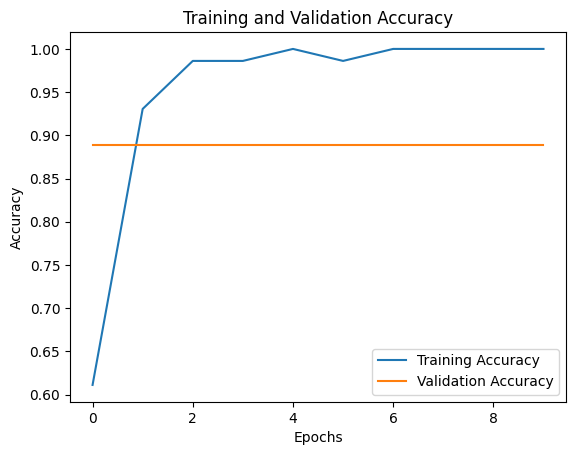

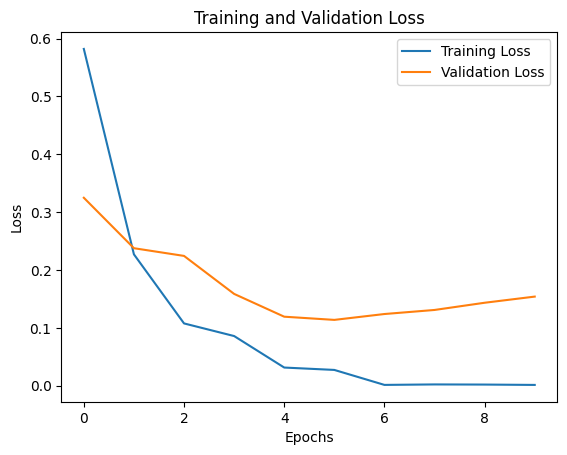

In [17]:
history = simple_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
test_loss, test_accuracy = simple_nn.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9524 - loss: 0.0770
Test Loss: 0.07702884823083878
Test Accuracy: 0.9523809552192688


### MultiClass classification:

In [28]:
features = []
labels = []

# Assign each species a unique label
species_keys = list(f.keys())
species_labels = {species: idx for idx, species in enumerate(species_keys)}

# Populate the features and labels with data from all species
for species, label in species_labels.items():
    data_species = f[species][:]
    for i in range(data_species.shape[2]):
        features.append(data_species[:, :, i])
        labels.append(label)

# Convert features and labels to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Normalize the features
features = features / np.max(features)

# Reshape features to add the channel dimension (e.g., grayscale images have 1 channel)
features = features[..., np.newaxis]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (463, 256, 343, 1)
y_train shape: (463,)
X_test shape: (116, 256, 343, 1)
y_test shape: (116,)


In [29]:
num_classes = len(species_labels)

In [30]:
num_classes = len(species_labels)

# First Model: Basic CNN (without Dropout layers)
cnn_model_basic = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 343, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

cnn_model_basic.compile(optimizer='adam', 
                        loss='sparse_categorical_crossentropy', 
                        metrics=['accuracy'])

# Fit the Basic CNN
history_basic = cnn_model_basic.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

C:\Users\vdalal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2399 - loss: 2.2331 - val_accuracy: 0.5532 - val_loss: 1.3863
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7517 - loss: 0.8262 - val_accuracy: 0.5532 - val_loss: 1.5507
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.8792 - loss: 0.4173 - val_accuracy: 0.6809 - val_loss: 1.5590
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9432 - loss: 0.1733 - val_accuracy: 0.8298 - val_loss: 1.6197
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9594 - loss: 0.1102 - val_accuracy: 0.7021 - val_loss: 1.8386
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9597 - loss: 0.1334 - val_accuracy: 0.5957 - val_loss: 2.6712
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9831 - loss: 0.0561 - val_accuracy: 0.7447 - val_loss: 2.1088
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9884 - loss: 0.0377 - val_accuracy: 0.6596 - val_loss:

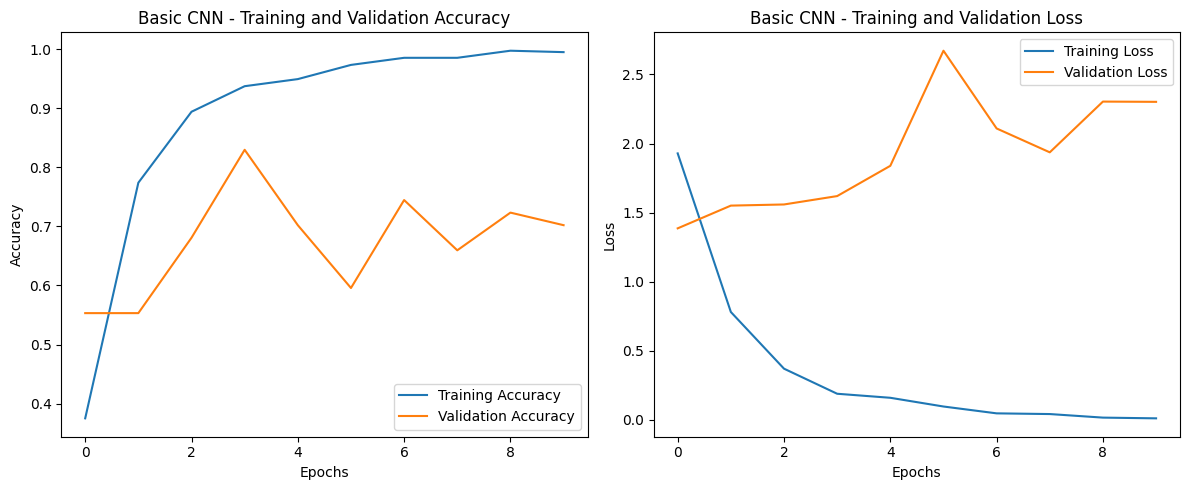

In [33]:
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'], label='Training Accuracy')
plt.plot(history_basic.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic CNN - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_basic.history['loss'], label='Training Loss')
plt.plot(history_basic.history['val_loss'], label='Validation Loss')
plt.title('Basic CNN - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
test_loss, test_accuracy = cnn_model_basic.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.6655 - loss: 3.0072
Test Loss: 2.96043062210083
Test Accuracy: 0.6637930870056152


In [34]:
cnn_model_dropout = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 343, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

cnn_model_dropout.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])

# Fit the CNN with Dropout
history_dropout = cnn_model_dropout.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1705 - loss: 2.4763 - val_accuracy: 0.4255 - val_loss: 2.0889
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.4281 - loss: 1.8030 - val_accuracy: 0.4468 - val_loss: 1.6341
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5927 - loss: 1.2777 - val_accuracy: 0.5745 - val_loss: 1.2235
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.7183 - loss: 0.8918 - val_accuracy: 0.6383 - val_loss: 1.1890
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7924 - loss: 0.6170 - val_accuracy: 0.5532 - val_loss: 1.2583
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8864 - loss: 0.3581 - val_accuracy: 0.6596 - val_loss: 1.1515
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8485 - loss: 0.4751 - val_accuracy: 0.7234 - val_loss: 1.1330
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8747 - loss: 0.4194 - val_accuracy: 0.7234 - val_loss:

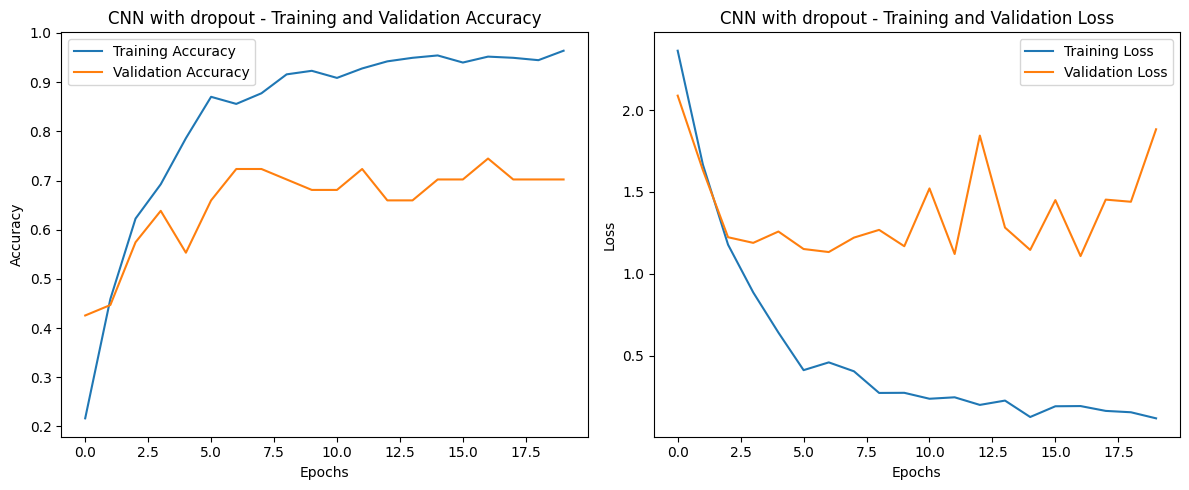

In [35]:
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN with dropout - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.title('CNN with dropout - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
test_loss, test_accuracy = cnn_model_dropout.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 384ms/step - accuracy: 0.7268 - loss: 2.0153
Test Loss: 2.055015802383423
Test Accuracy: 0.7155172228813171


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step


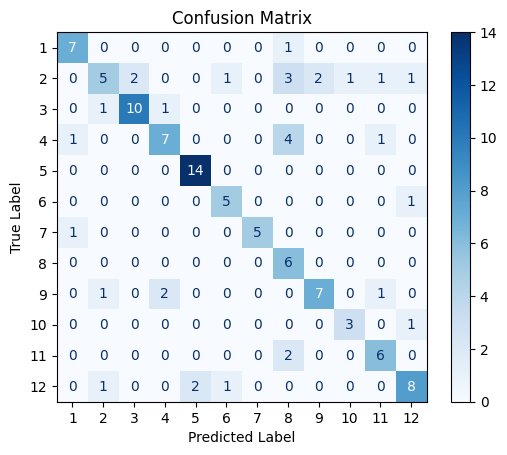

In [40]:
# Make predictions on the test data
y_pred = np.argmax(cnn_model_dropout.predict(X_test), axis=1)  # Get the index of the highest probability class

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,2,3,4,5,6,7,8,9,10,11,12])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [44]:
dense_model_dropout = keras.Sequential([
    layers.Flatten(input_shape=(256, 343, 1)),  # Flattening the input image
    layers.Dense(128, activation='relu'),  # First dense layer
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(128, activation='relu'),  # Second dense layer
    layers.Dropout(0.5),  # Another Dropout
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

dense_model_dropout.compile(optimizer='adam', 
                            loss='sparse_categorical_crossentropy', 
                            metrics=['accuracy'])

# Fit the Dense Network with Dropout
history_dense = dense_model_dropout.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.0796 - loss: 3.0462 - val_accuracy: 0.4043 - val_loss: 2.2937
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.2351 - loss: 2.1928 - val_accuracy: 0.3404 - val_loss: 2.0037
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.3039 - loss: 2.1469 - val_accuracy: 0.3830 - val_loss: 2.0465
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.3271 - loss: 2.0066 - val_accuracy: 0.4468 - val_loss: 1.7890
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.3611 - loss: 1.9575 - val_accuracy: 0.5319 - val_loss: 1.7027
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.4366 - loss: 1.6914 - val_accuracy: 0.5106 - val_loss: 1.6496
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.4595 - loss: 1.6569 - val_accuracy: 0.5745 - val_loss: 1.5373
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.5225 - loss: 1.5270 - val_accuracy: 0.

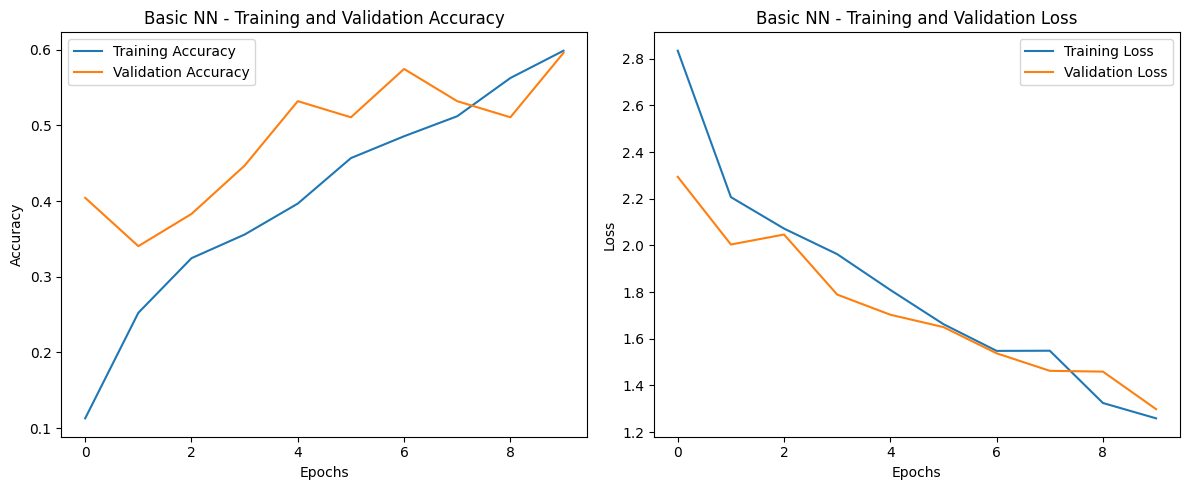

In [45]:
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'], label='Training Accuracy')
plt.plot(history_dense.history['val_accuracy'], label='Validation Accuracy')
plt.title('Basic NN - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_dense.history['loss'], label='Training Loss')
plt.plot(history_dense.history['val_loss'], label='Validation Loss')
plt.title('Basic NN - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
test_loss, test_accuracy = dense_model_dropout.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5672 - loss: 1.3805
Test Loss: 1.4417622089385986
Test Accuracy: 0.568965494632721


In [67]:
cnn_model_dropout.save("cnn_model_dropout.h5")

### Testing on test data:

In [32]:
import librosa
import os
from tensorflow.keras.models import load_model

In [39]:
def preprocess_clip(file_path, output_dir, sample_rate=22050, bird_call_window_size=2, n_fft=2048, hop_length=512):
    # Load the sound clip
    y, sr = librosa.load(file_path, sr=sample_rate)

    # Calculate the RMS energy
    energy = librosa.feature.rms(y=y, frame_length=n_fft, hop_length=hop_length)

    # Identify loud portions based on a threshold (0.5 times the maximum energy)
    loud_indexes = np.where(energy > np.max(energy) * 0.5)[1]

    # Loop through each "loud" part of the sound clip
    for loud_idx in loud_indexes:
        # Compute the start and end times of the bird call window
        start_time = loud_idx * hop_length / sr
        end_time = start_time + bird_call_window_size

        # Extract the bird call audio
        bird_call_audio = y[int(start_time * sr):int(end_time * sr)]

        # Calculate the mel-spectrogram
        spectrogram = librosa.feature.melspectrogram(y=bird_call_audio, sr=sr, n_fft=n_fft, hop_length=hop_length,
                                                     n_mels=36, fmax=8000)

        # Resize the spectrogram to have a fixed width of 343 frames
        if spectrogram.shape[1] < 343:
            padding = np.zeros((36, 343 - spectrogram.shape[1]))
            spectrogram = np.hstack((spectrogram, padding))
        elif spectrogram.shape[1] > 343:
            spectrogram = spectrogram[:, :343]

        # Save the spectrogram
        filename = os.path.splitext(os.path.basename(file_path))[0] + f'_window_{start_time:.2f}.npy'
        np.save(os.path.join(output_dir, filename), spectrogram)

# Directory containing the sound clips
sound_clips_dir = './test_birds/'

# Directory to save preprocessed spectrograms
output_dir = './preprocessed_spectrograms/'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Iterate over sound clips in the directory
for filename in os.listdir(sound_clips_dir):
    if filename.endswith('.mp3'):
        file_path = os.path.join(sound_clips_dir, filename)
        preprocess_clip(file_path, output_dir)

print("Preprocessing completed.")

Preprocessing completed.


In [68]:
model = load_model('./cnn_model_dropout.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
# Define the mapping of class indices to bird species names
class_to_species = {
    0: 'amecro', 1: 'barswa', 2: 'bkcchi', 3: 'blujay', 4: 'daejun', 5: 'houfin',
    6: 'mallar3', 7: 'norfli', 8: 'rewbla', 9: 'stejay', 10: 'wesmea', 11: 'whcspa'
}

preprocessed_spectrograms_dir = './preprocessed_spectrograms/'

# List to store predictions for each spectrogram
predictions = []
file_names = []

# Iterate over preprocessed spectrograms in the directory
for filename in os.listdir(preprocessed_spectrograms_dir):
    if filename.endswith('.npy'):
        file_path = os.path.join(preprocessed_spectrograms_dir, filename)
        spectrogram = np.load(file_path)
        spectrogram = spectrogram.flatten()
        spectrogram = np.pad(spectrogram, (0, 256*343 - spectrogram.size), mode='constant')
        spectrogram = np.reshape(spectrogram, (1, 256, 343, 1))  # Reshape to match model's input shape
        prediction = model.predict(spectrogram)
        predictions.append(prediction)
        file_names.append(filename.split('.')[0])  # Get the file name without the extension

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Iterate over predictions and file names
for i, (prediction, file_name) in enumerate(zip(predictions, file_names)):
    # Get the original label from the file name
    original_label = file_name.split('_window_')[0]
    print(f"Original Label: {original_label}")

    # Get the top 5 predicted class indices and probabilities
    top_indices = prediction[0].argsort()[-5:][::-1]
    top_probs = prediction[0][top_indices]

    # Print the top 5 predictions
    for j, (index, prob) in enumerate(zip(top_indices, top_probs)):
        species = class_to_species[index]
        print(f"Top {j+1} Predicted Bird Species: {species} - Class: {index} - Probability: {prob:.4f}")

    print()  # Add a blank line for better readability

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 254, 341, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 127, 170, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 127, 170, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 125, 168, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 62, 84, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 62, 84, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 60, 82, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 30, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 30, 41, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 157440)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │      20,152,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,246,668 (77.23 MB)

 Trainable params: 20,246,668 (77.23 MB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━